# Bird Classifier

About Data: An image dataset with photos of 200 bird species (mostly North American); it can also be used for localization. Number of categories: 200; Number of images: 11,788; Annotations per image: 15 Part Locations, 312 Binary Attributes, 1 Bounding Box

By: Alex Moozhayil and David Le

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 32

### Looking at the Data

In [4]:
path = untar_data(URLs.CUB_200_2011)
path

PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011')

In [5]:
path.ls()

[PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/parts'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/bounding_boxes.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/image_class_labels.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/README'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/attributes'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/classes.txt'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/train_test_split.txt')]

In [6]:
path_img = path/'images'

In [8]:
p = Path(path_img)
dirs = [x for x in p.iterdir() if x.is_dir()]
fnames = [get_image_files(y) for y in dirs]
fnames = [item for sublist in fnames for item in sublist]
fnames[:5]

[PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0103_188483.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0055_188123.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0004_188188.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0134_188213.jpg'),
 PosixPath('/home/alexbm92/.fastai/data/CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0069_188776.jpg')]

In [9]:
np.random.seed(2)
pat = r'/([^/]+)_\d+_\d+.jpg$'
model_path = Path('.model').absolute()

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

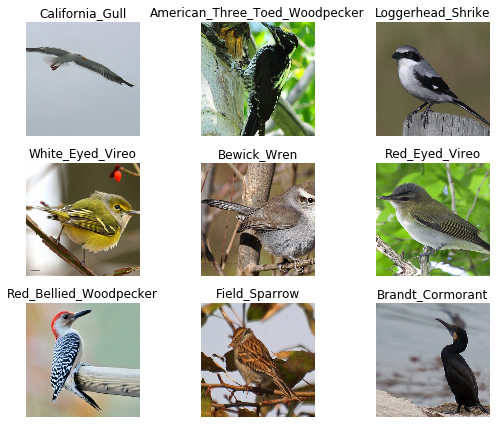

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
data.classes

['Acadian_Flycatcher',
 'American_Crow',
 'American_Goldfinch',
 'American_Pipit',
 'American_Redstart',
 'American_Three_Toed_Woodpecker',
 'Anna_Hummingbird',
 'Artic_Tern',
 'Baird_Sparrow',
 'Baltimore_Oriole',
 'Bank_Swallow',
 'Barn_Swallow',
 'Bay_Breasted_Warbler',
 'Belted_Kingfisher',
 'Bewick_Wren',
 'Black_And_White_Warbler',
 'Black_Billed_Cuckoo',
 'Black_Capped_Vireo',
 'Black_Footed_Albatross',
 'Black_Tern',
 'Black_Throated_Blue_Warbler',
 'Black_Throated_Sparrow',
 'Blue_Grosbeak',
 'Blue_Headed_Vireo',
 'Blue_Jay',
 'Blue_Winged_Warbler',
 'Boat_Tailed_Grackle',
 'Bobolink',
 'Bohemian_Waxwing',
 'Brandt_Cormorant',
 'Brewer_Blackbird',
 'Brewer_Sparrow',
 'Bronzed_Cowbird',
 'Brown_Creeper',
 'Brown_Pelican',
 'Brown_Thrasher',
 'Cactus_Wren',
 'California_Gull',
 'Canada_Warbler',
 'Cape_Glossy_Starling',
 'Cape_May_Warbler',
 'Cardinal',
 'Carolina_Wren',
 'Caspian_Tern',
 'Cedar_Waxwing',
 'Cerulean_Warbler',
 'Chestnut_Sided_Warbler',
 'Chipping_Sparrow',
 'Chu

## Training: resnet34

In [13]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [14]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.645887,1.696008,0.438693,00:59
1,1.497603,1.177935,0.327111,00:57


In [15]:
learn.save('stage-2')

## Results

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

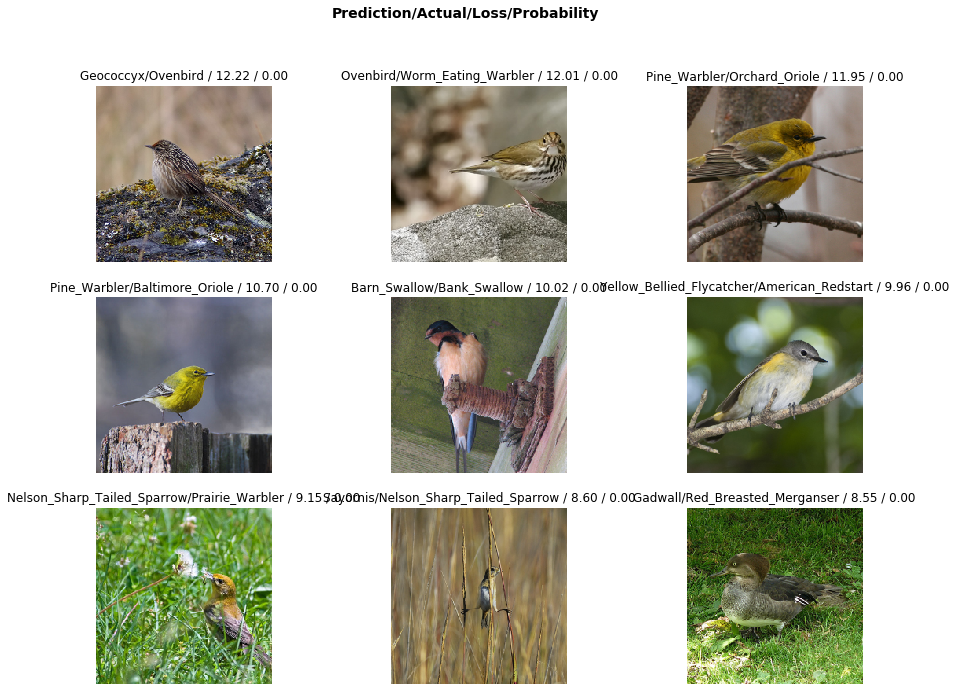

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

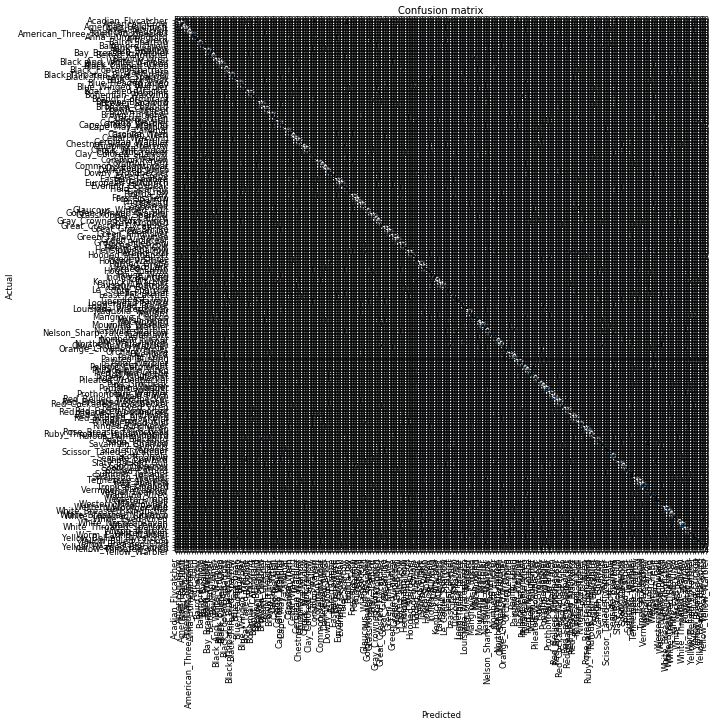

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=2)

[('Common_Tern', 'Caspian_Tern', 8),
 ('Fish_Crow', 'Common_Raven', 8),
 ('Elegant_Tern', 'Caspian_Tern', 7),
 ('American_Crow', 'Common_Raven', 6),
 ('Western_Gull', 'California_Gull', 5),
 ('American_Crow', 'Fish_Crow', 4),
 ('Blue_Grosbeak', 'Indigo_Bunting', 4),
 ('Brandt_Cormorant', 'Pelagic_Cormorant', 4),
 ('Glaucous_Winged_Gull', 'Ring_Billed_Gull', 4),
 ('Least_Flycatcher', 'Acadian_Flycatcher', 4),
 ('Olive_Sided_Flycatcher', 'Western_Wood_Pewee', 4),
 ('Savannah_Sparrow', 'Vesper_Sparrow', 4),
 ('Shiny_Cowbird', 'Boat_Tailed_Grackle', 4),
 ('Slaty_Backed_Gull', 'Western_Gull', 4),
 ('Acadian_Flycatcher', 'Yellow_Bellied_Flycatcher', 3),
 ('American_Crow', 'Brewer_Blackbird', 3),
 ('California_Gull', 'Ring_Billed_Gull', 3),
 ('Chuck_Will_Widow', 'Whip_Poor_Will', 3),
 ('Clay_Colored_Sparrow', 'Brewer_Sparrow', 3),
 ('Common_Tern', 'Artic_Tern', 3),
 ('Eared_Grebe', 'Horned_Grebe', 3),
 ('Gray_Kingbird', 'Mockingbird', 3),
 ('Great_Grey_Shrike', 'Loggerhead_Shrike', 3),
 ('Hoo

In [23]:
learn.export('trained_model.pkl')